In [1]:
import numpy as np
import complexplorer as cx
import matplotlib.pyplot as plt
import re
import os.path

plt.rcParams["figure.figsize"] = (3, 3)

# Complexplorer

Complexplorer is a Python library for visualization of complex functions. 
The library was insipred by Elias Wegert's book ["Visual Complex Functions - An Introduction with Phase Portraits"](https://link.springer.com/book/10.1007/978-3-0348-0180-5) and it greatly benefitted from discussions and feedback that Elias kindly provided. The library supports enhanced phase portraits and 
several other visual styles. 

The library provides classes and functions to:  

* Create complex domains and corresponding complex-valued 2D arrays (meshes)
* Convert complex-valued 2D arrays to HSV and RGB color maps according to various schemes (Enhanced Phase Portrait, Chessboard, PolarChessboard, LogRings)
* Visualize complex-valued 2D arrays as 2D and 3D plots (2D image, 3D analytic landscape, 3D Riemann sphere)

Design choices of this library enable:  

* Simple composability: any domain can be used with any plot and any color map, yielding a multitude of different visualizations.
* Deferred evaluation of domain meshes. Meshing is typically performed during plotting (and not during domain instanciation). This allows for quick iteration of mesh period for best visual results.
* Different domain instances can be composed using union and intersection operations to create complex domains.

One exception from the composability ideal is Riemann sphere 3D plot. It has its own meshing algorithm to balance point density between the poles and equator.

Complexplorer is designed to be very light-weight in terms of its dependencies. It requires only numpy and matplotlib, which comes at a cost. 
Matplotlib is not a 3D rendering library, so 3D visualizations are painfully slow. This is especially true for Riemann sphere plot which uses 
a custom rectangular mesh that wastes a lot of points at the poles. A triangular mesh would be the right tool here, but I have not figured out how to achieve arbitrary point coloring in matplotlib.

## Documentation

Every module, class, and function of the library is documented via a docstring. Use `help` or `?` to view them.


In [2]:
help(cx.phase)

Help on function phase in module complexplorer.funcs:

phase(z: complex)
    Return a phase of complex input mapped to [0, 2*pi) interval.
    
    Parameters:
    -----------
    z: complex
        Input complex number.
    
    Returns:
    --------
    float
        Phase of input z mapped to [0, 2*pi) interval.



## Basic functionality

Let's define a square complex domain and visualize a test function $f(z) = \frac{z - 1}{z^2 + z + 1}$ on it (a standard example used in ["Visual Complex Functions - An Introduction with Phase Portraits"](https://link.springer.com/book/10.1007/978-3-0348-0180-5)). 

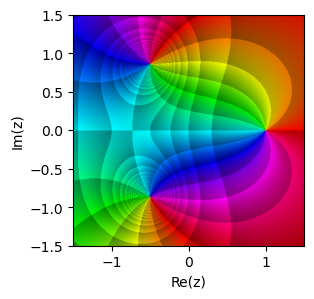

In [3]:
domain = cx.Rectangle(3, 3)
test_func = lambda z: (z - 1) / (z**2 + z + 1)
cx.plot(domain, test_func)

Note that generation of actual complex meshes for plots is deferred and is typically performed inside a plotting function. Therefore, the fineness of the mesh can be easily adjusted by changing the value of the `n` parameter:

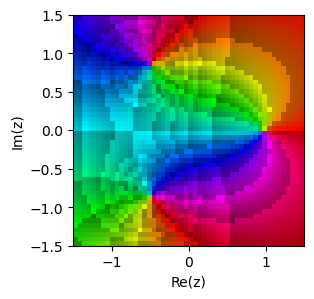

In [6]:
cx.plot(domain, test_func, n=50)

Different shapes of domains are supported (and domain instances can be composed using union or intersection operations). See [Domains and Color Maps example](https://github.com/kuvychko/complexplorer/tree/main/examples/domains_cmaps_example.ipynb) for in-depth discussion.

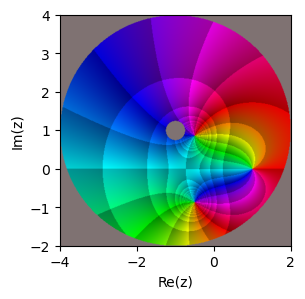

In [17]:
annulus = cx.Annulus(0.25, 3, center=-1+1j)
cx.plot(annulus, test_func, n=400, cmap=cx.Phase(6, 0.6, out_of_domain_hsv=(0.0, 0.1, 0.5)))

## 3D Analytic landscape

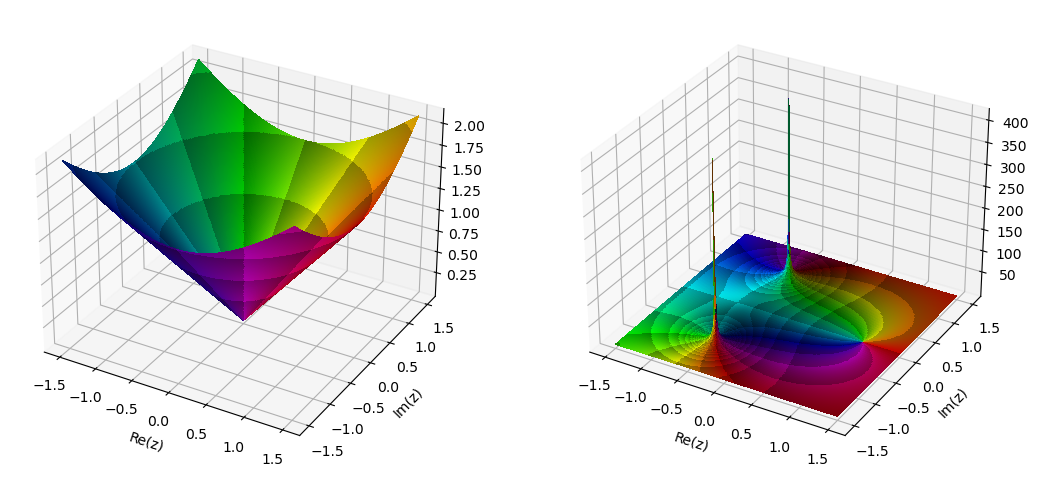

In [3]:
cx.pair_plot_landscape(domain, test_func)

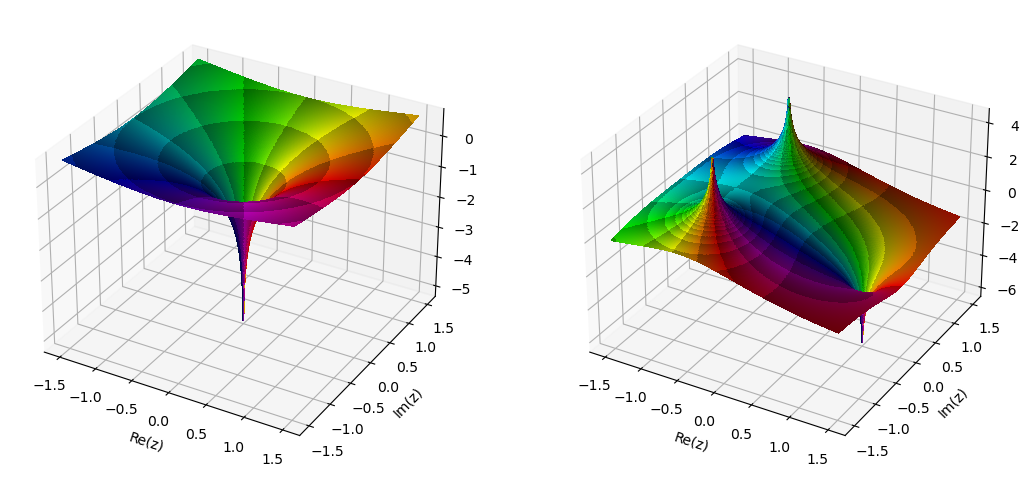

In [18]:
cx.pair_plot_landscape(domain, test_func, zaxis_log=True, z_max=100)

## Custom plots with matplotlib.axes.Axes

Many plotting functions of complexplorer library accept `ax=matplotlib.axes.Axes` as an optional argument. You can use it to build composite plots of arbitrary complexity.

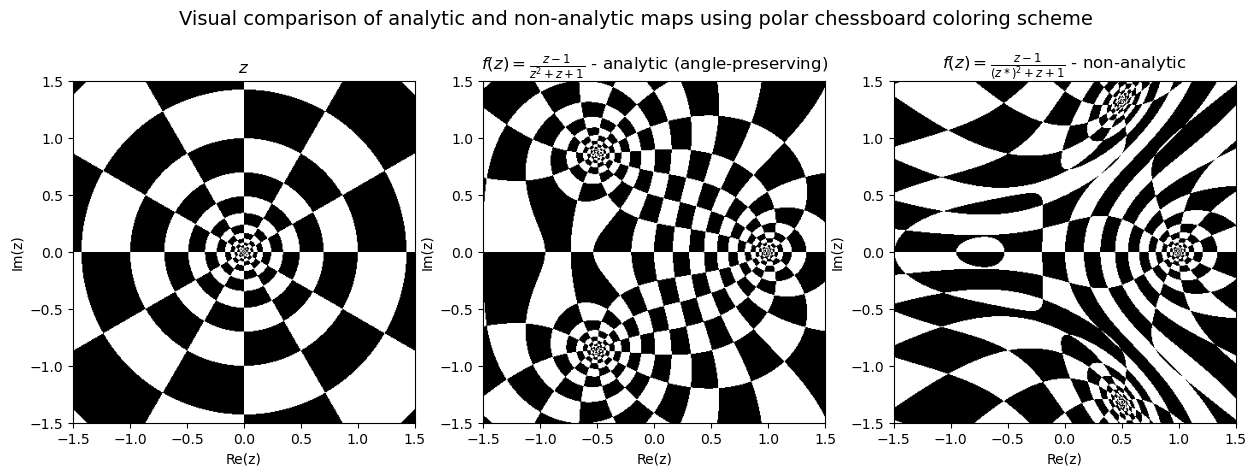

In [6]:
test_func2 = lambda z: (z - 1) / (np.conjugate(z)**2 + z + 1)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5))
cx.plot(domain, lambda x: x, n=400,
        cmap=cx.PolarChessboard(6, r_log=0.7), title=r'$z$', ax=ax0)
cx.plot(domain, test_func, n=400,
        cmap=cx.PolarChessboard(6, r_log=0.7), title=r'$f(z) = \frac{z - 1}{z^2 + z + 1}$ - analytic (angle-preserving)', ax=ax1)
cx.plot(domain, test_func2, n=400, 
        cmap=cx.PolarChessboard(6, r_log=0.7), title=r'$f(z) = \frac{z - 1}{(z*)^2 + z + 1}$ - non-analytic', ax=ax2)
_ = fig.suptitle('Visual comparison of analytic and non-analytic maps using polar chessboard coloring scheme', fontsize=14)
# plt.savefig('comparison.png')

## Overview of Color Maps

Default color map used throughout the library is Enhanced Phase Portrait defined as `complexplorer.Phase(6, 0.5)`. Let's experiment with other options.

In [4]:
def make_pathname(path, name, suffix):
    "Helper function to prepare a nice filename"
    name = re.sub(r"[()-]", "", name)
    name = "_".join(name.split()) # remove any multiple spaces, then join using underscore
    name = name + suffix
    return os.path.join(path, name)

In [7]:
def show_cmaps_2d(cmaps: dict):
    for name, cmap in cmaps.items():
        pathname = make_pathname('gallery', name, '_2d.png')
        cx.pair_plot(domain, test_func, figsize=(6,3), title=name, cmap=cmap, filename=pathname)

In [6]:
cmaps_dict = {
    'Phase portrait': cx.Phase(),
    'Phase portrait (phase enhanced)': cx.Phase(6),
    'Phase portrait (modulus enhanced)': cx.Phase(None, 0.6),
    'Enhanced phase portrait (phase and modulus enhanced)': cx.Phase(6, 0.6),
    'Cartesian chessboard': cx.Chessboard(spacing=0.25),
    'Polar chessboard (linear modulus spacing)': cx.PolarChessboard(6, 0.25),
    'Polar chessboard (log modulus spacing)': cx.PolarChessboard(6, r_log=np.e),
    'Logarithmic rings': cx.LogRings(log_spacing=0.2),
}

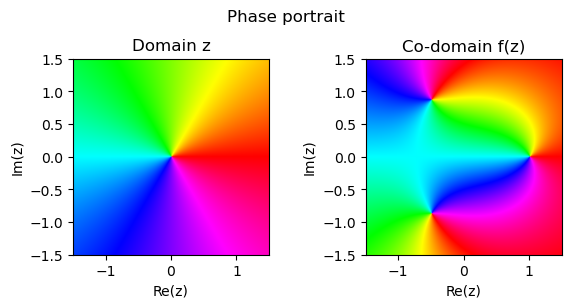

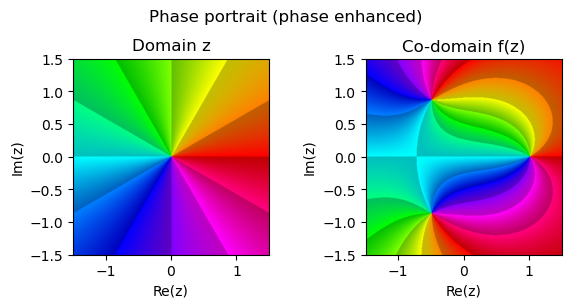

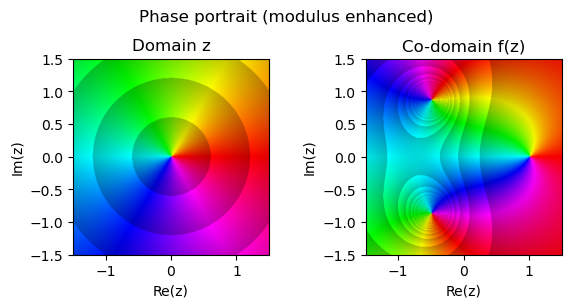

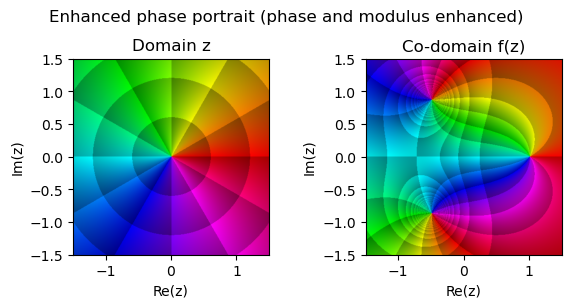

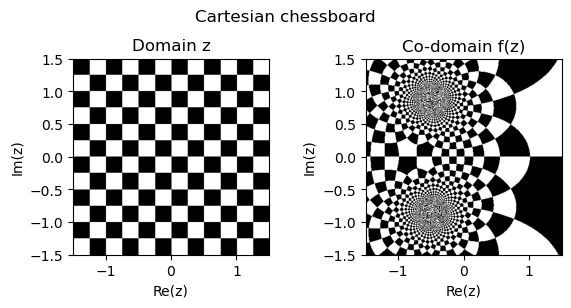

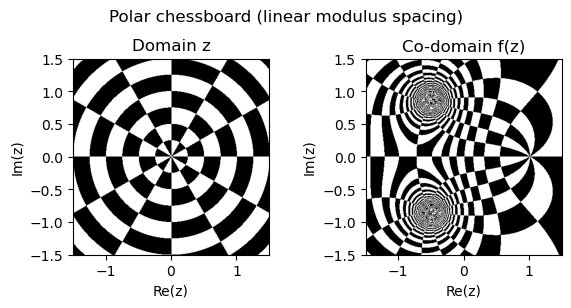

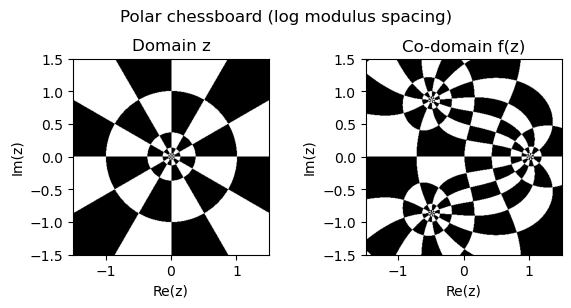

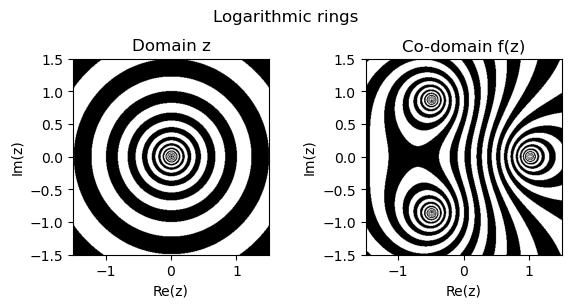

In [7]:
show_cmaps_2d(cmaps=cmaps_dict)

## 3D Analytic landscapes with different color maps

Color maps can be used with any plotting function of `complexplorer` to create custom plots.

In [8]:
def show_cmaps_3d(cmaps: dict):
    for name, cmap in cmaps.items():
        pathname = make_pathname('gallery', name, '_3d.png')
        cx.pair_plot_landscape(domain, test_func, figsize=(6,3), title=name, cmap=cmap, z_max=10, filename=pathname)

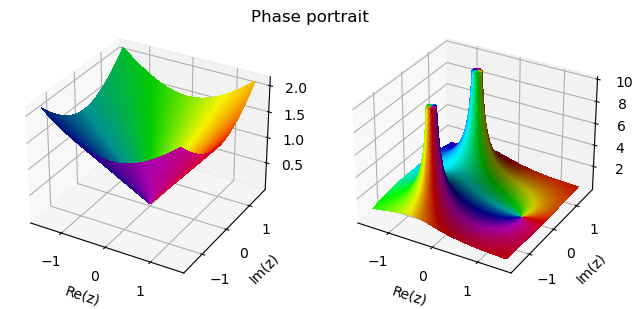

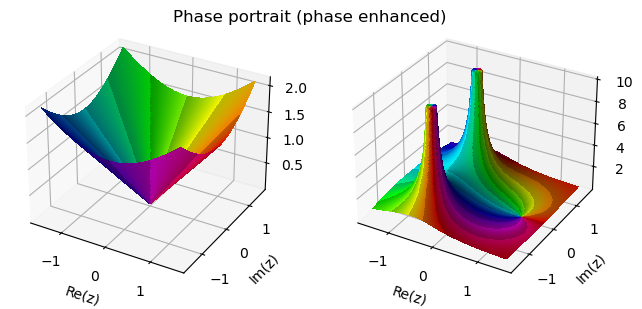

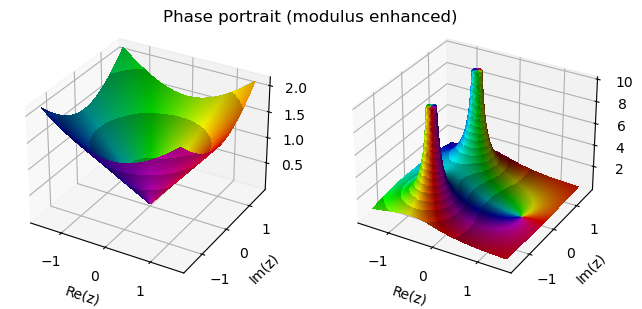

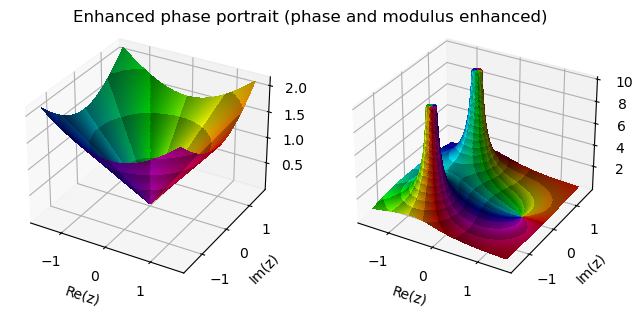

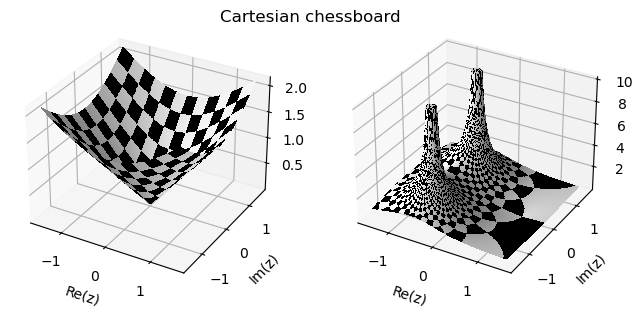

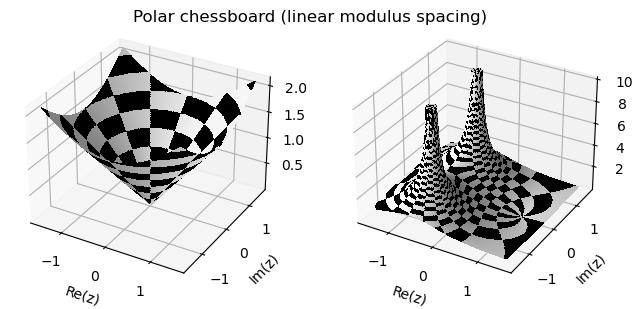

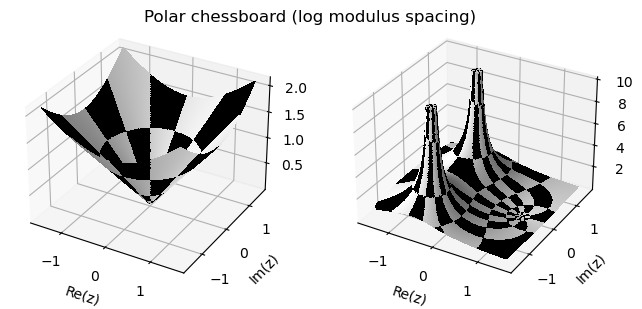

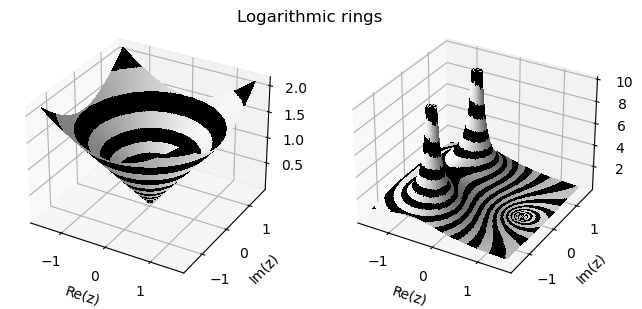

In [8]:
show_cmaps_3d(cmaps=cmaps_dict)

## 2D Riemann charts

This is a convenient option for visualization of complex function across the whole complex plane via projections of Riemann hemispheres on to complex plane.

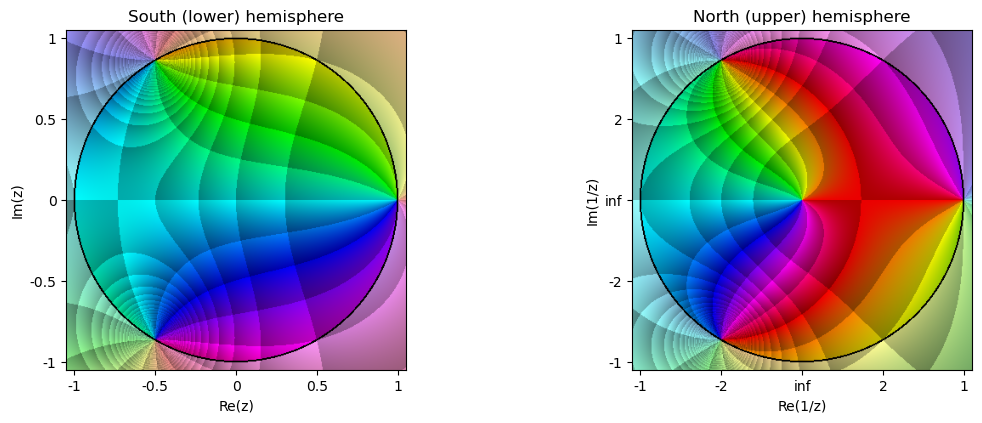

In [4]:
cx.riemann_hemispheres(test_func, filename='gallery\\riemann_chart_2d.png')

## 3D Riemann sphere

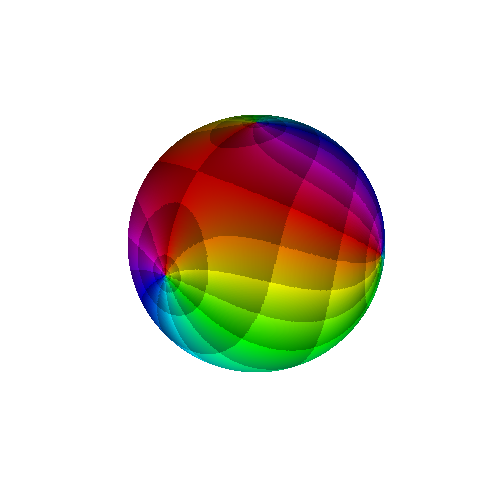

In [3]:
_ = cx.riemann(
    test_func, n=600, project_from_north=True,
    cmap=cx.Phase(6, 1, r_log_base=np.e),
    filename='gallery\\riemann_sphere_3d.png'
)